<a href="https://colab.research.google.com/github/Makrufkasr/Data-Science-Job-Salaries/blob/main/Cleansing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
df = df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 61.6+ KB


In [12]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

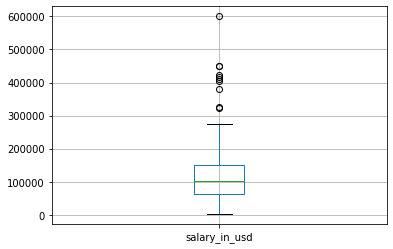

In [13]:
df.boxplot(column='salary_in_usd')

## Cleaning Data

In [16]:
q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)

upper_limit = q3 + 1.5*(q3-q1)
lower_limit = q1 - 1.5*(q3-q1)


In [17]:
df= df[df['salary_in_usd'] > lower_limit]
df = df[df['salary_in_usd'] < upper_limit]
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,597.000000,597.000000,5.970000e+02,597.000000,597.000000
mean,304.095477,2021.412060,3.224171e+05,107168.855946,70.686767
std,174.888716,0.688634,1.557181e+06,58555.516292,40.797800
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.000000
25%,153.000000,2021.000000,6.999900e+04,62649.000000,50.000000
50%,305.000000,2022.000000,1.129000e+05,100000.000000,100.000000
75%,454.000000,2022.000000,1.600000e+05,148261.000000,100.000000
max,606.000000,2022.000000,3.040000e+07,276000.000000,100.000000


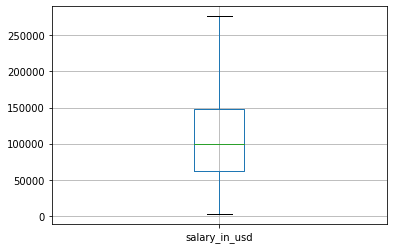

In [18]:
df.boxplot(column='salary_in_usd')

##Delete column not important

In [22]:
df = df.drop('salary_currency', axis = 1)
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


##Changing values


In [24]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-Level')
df['experience_level'] = df['experience_level'].replace('MI','Mid-Level')
df['experience_level'] = df['experience_level'].replace('SE','Senior-Level')

In [25]:
df['experience_level'] = df['experience_level'].replace('EX','Executive-Level')

In [26]:
df['employment_type'] = df['employment_type'].replace('FT', 'Full Time')
df['employment_type'] = df['employment_type'].replace('PT', 'Part Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contract')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelance')

In [27]:
df['company_size'] = df['company_size'].replace('S','Small')
df['company_size'] = df['company_size'].replace('M','Medium')
df['company_size'] = df['company_size'].replace('L','Large')

In [28]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid-Level,Full Time,Data Scientist,79833,DE,0,DE,Large
1,1,2020,Senior-Level,Full Time,Machine Learning Scientist,260000,JP,0,JP,Small
2,2,2020,Senior-Level,Full Time,Big Data Engineer,109024,GB,50,GB,Medium
3,3,2020,Mid-Level,Full Time,Product Data Analyst,20000,HN,0,HN,Small
4,4,2020,Senior-Level,Full Time,Machine Learning Engineer,150000,US,50,US,Large


In [30]:
df.to_csv('Salary_Cleaned.csv')
from google.colab import files
files.download('Salary_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>